The eigen value equation can be solved in different method some popular ones are (1) Finite difference method(Which Griffith shows in Problem 2.61(Quantum mechanics 3rd edition)) and (2)Shooting method.

# Finite Difference method
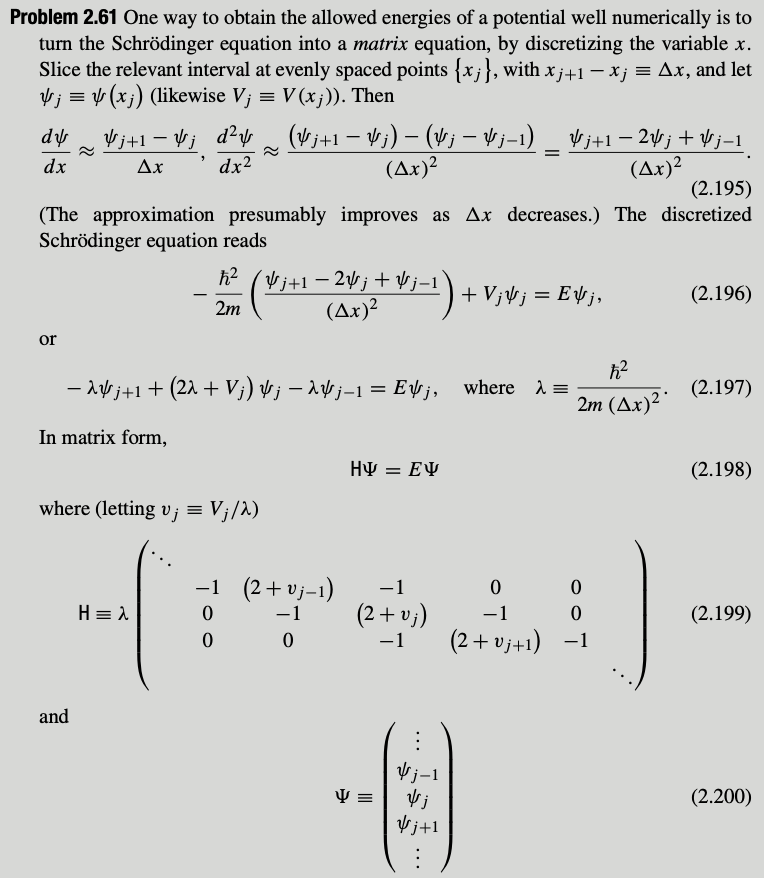

You can see we have to find the matrix(Hamiltonian) $H$ and solve it to find eigen values and eigen functions. There is a property in this matrix it is a **tridiagonal matrix**(Because in each row there are only three non-zero elements(a diagonal element and two offdiagonal element)). There is a dedicated method in `scipy` library named [eigh_tridiagonal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh_tridiagonal.html#scipy.linalg.eigh_tridiagonal). 

Python in-built `list` is very slow due to its dynamic memeory whereas `numpy` use array which have a definite and less memory.

In [10]:
import numpy as np     
import matplotlib.pyplot as plt #Plotting
from scipy.linalg import eigh_tridiagonal
import scienceplots
plt.style.use(['science', 'notebook', 'grid']) # To make plotting nice.

# Linear harmonic oscillator in 1D
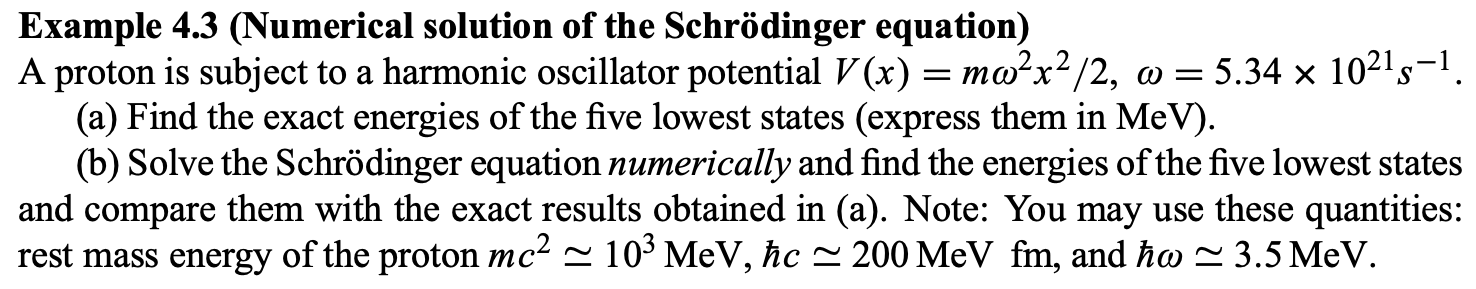
Some variables,
$$\lambda = \frac{\hbar^2}{2m(\Delta x)^2}= \frac{(\hbar c)^2}{2mc^2(\Delta x)^2}$$

Given, $mc^2 \approx 10^3 MeV$, $\hbar c \approx 200 MeV fm$ and $\hbar \omega = 3.5 MeV$

$$V = \frac{1}{2}m\omega^2 x^2=\frac{m^2 \omega^2}{\hbar^2}\times\frac{\hbar^2}{2m}x^2$$

Now, $\frac{m^2\omega^2}{\hbar^2}=\frac{(mc^2)^2(\hbar\omega)^2}{(\hbar c)^4}=7.66\times 10^{-3}fm^{-3}$ and $\frac{2m}{\hbar^2} = \frac{2mc^2}{(\hbar c)^2}\approx 0.05 MeV^{-1} fm^{-2}$

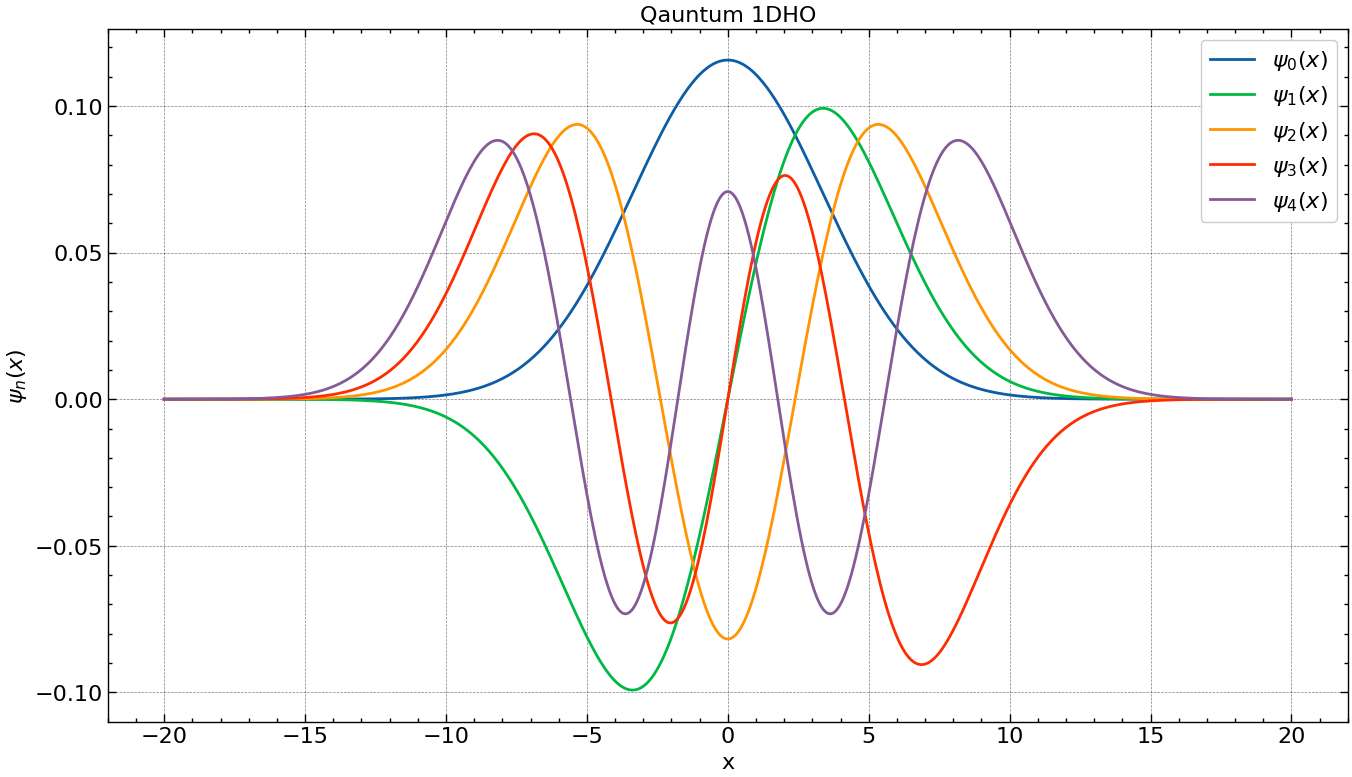

In [16]:
N = 500
xmin = -20 #fm     There is theoratical point of view to assign this point
xmax = 20 #fm      Which can be found in Zetli Quantum mechanics book
x, dx = np.linspace(xmin, xmax, N, retstep = True)

L = 200**2/(2*1e3*dx**2) #L stands for $\lambda$

V = (7.66e-3)*x**2/(0.05)

Diagonal = 2*L*np.ones(N) + V
OffDiagonal = -L*np.ones(N-1)

E, psi = eigh_tridiagonal(Diagonal, OffDiagonal)    #This is the main function in this program


#Plotting
plt.figure(figsize = (16, 9))
plt.title("Qauntum 1DHO")
plt.plot(x, psi.T[0], label = r"$\psi_{0}(x)$")
plt.plot(x, psi.T[1], label = r"$\psi_{1}(x)$")
plt.plot(x, psi.T[2], label = r"$\psi_{2}(x)$")
plt.plot(x, psi.T[3], label = r"$\psi_{3}(x)$")
plt.plot(x, psi.T[4], label = r"$\psi_{4}(x)$")
plt.xlabel("x")
plt.ylabel(r"$\psi_n(x)$")
plt.legend()
plt.show()

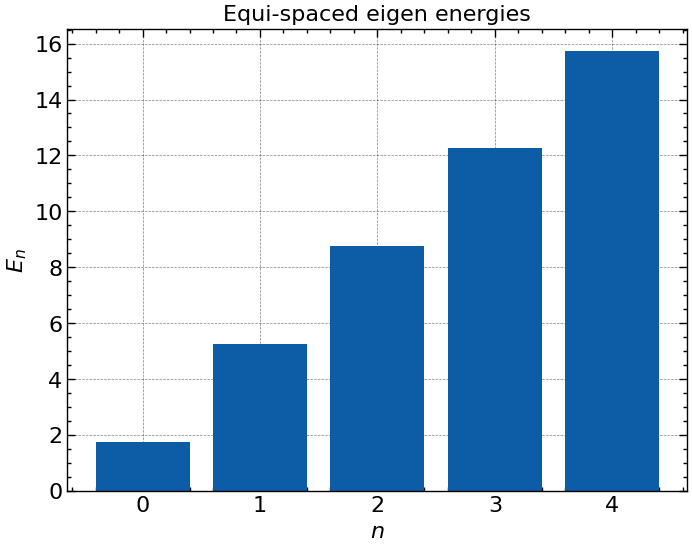

In [12]:
plt.bar(np.linspace(0, 4, 5), E[0:5])
plt.title("Equi-spaced eigen energies")
plt.xlabel(r"$n$")
plt.ylabel(r"$E_n$")
plt.show()

In [13]:
E[0:5]

array([ 1.75036699,  5.25097791,  8.75134268, 12.25146129, 15.75133371])

Analytically, $$E_n = (n + \frac{1}{2})\hbar \omega$$

In [14]:
for n in range(0, 5):
    print(3.5*(n + 1/2), "MeV")

1.75 MeV
5.25 MeV
8.75 MeV
12.25 MeV
15.75 MeV


The reason behind why I used finite difference method is it has very less error compare to shooting method. And shooting method have longer time complexity due to loop.